In [1]:
# WeatherPy

## Starter Code to Generate Random Geographic Coordinates and a List of Cities## Starter Code to Generate Random Geographic Coordinates and a List of Cities.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Import API key
from Openweathermap_config import Open_Weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


In [5]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={Open_Weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | brae
Processing Record 2 of Set 1 | katsuura
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | benguela
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | touros
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | kloulklubed
Processing Record 10 of Set 1 | praia da vitoria
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | port macquarie
Processing Record 14 of Set 1 | malanje
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | neiafu
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 19 of Set 1 | bengkulu
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | east london
Processi

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,brae,60.3964,-1.3530,4.45,72,100,7.94,GB,1680069600
1,katsuura,35.1333,140.3000,12.32,87,100,6.69,JP,1680069564
2,saint-philippe,-21.3585,55.7679,27.77,60,61,3.27,RE,1680069660
3,benguela,-12.5763,13.4055,25.65,74,78,1.20,AO,1680069759
4,tuktoyaktuk,69.4541,-133.0374,-14.00,78,75,6.69,CA,1680069578


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("city_data.csv", encoding="utf-8", index=False)

In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("city_data.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("city_data.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,brae,60.3964,-1.3530,4.45,72,100,7.94,GB,1680069600
1,katsuura,35.1333,140.3000,12.32,87,100,6.69,JP,1680069564
2,saint-philippe,-21.3585,55.7679,27.77,60,61,3.27,RE,1680069660
3,benguela,-12.5763,13.4055,25.65,74,78,1.20,AO,1680069759
4,tuktoyaktuk,69.4541,-133.0374,-14.00,78,75,6.69,CA,1680069578


In [14]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,20.041640,17.956944,13.563974,71.452381,56.564103,3.623425,1.680070e+09
std,33.493126,89.369629,13.512177,21.155140,39.725994,2.499019,1.228207e+02
min,-54.800000,-175.200000,-29.540000,9.000000,0.000000,0.000000,1.680069e+09
25%,-8.003175,-59.011225,4.532500,61.000000,12.250000,1.760000,1.680070e+09
50%,25.451550,20.661900,15.965000,76.000000,63.000000,3.170000,1.680070e+09
75%,47.686850,92.719175,24.615000,87.000000,99.000000,5.005000,1.680070e+09
max,78.218600,179.316700,38.410000,100.000000,100.000000,18.400000,1.680070e+09


In [13]:
### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

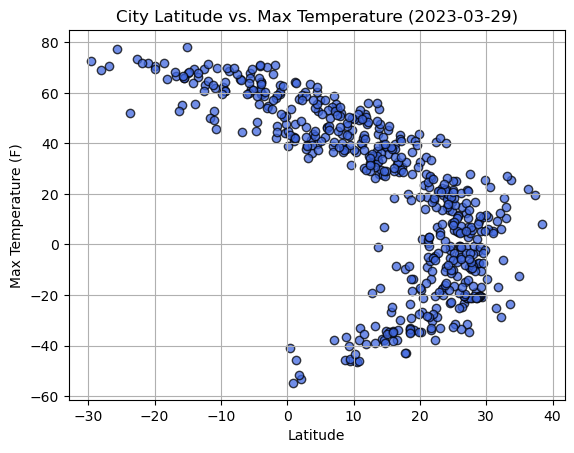

In [40]:
# Latitude Vs. Temperature

import datetime as dt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("Latitude Vs. Temperature.png")

# Show plot
plt.show()

In [41]:
#### Latitude Vs. Humidity

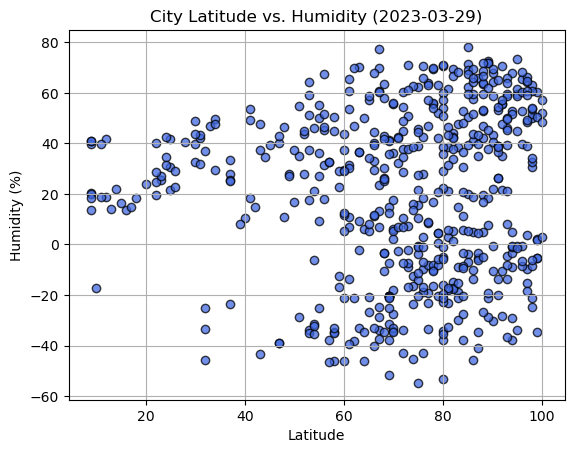

In [42]:
# Latitude Vs. Humidity

# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("Latitude Vs. Humidity.png")

# Show plot
plt.show()

In [43]:
#### Latitude Vs. Cloudiness

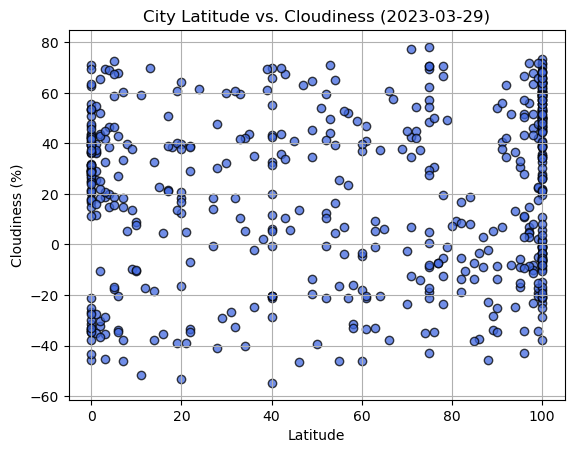

In [44]:
# Latitude Vs. Cloudiness

# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("Latitude Vs. Cloudiness.png")

# Show plot
plt.show()

In [45]:
#### Latitude vs. Wind Speed Plot

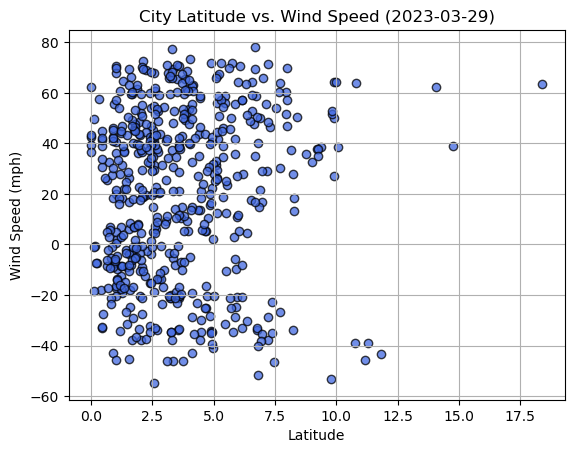

In [46]:
# Latitude vs. Wind Speed Plot

# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure
plt.savefig("Latitude Vs. Wind Speed Plot.png")

# Show plot
plt.show()

In [47]:
## Requirement 2: Compute Linear Regression for Each Relationship

In [48]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    
    # Plot regression line
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=18, color="darkred")
    
    # Plot scatter plot
    plt.scatter(x, y, marker='o', color='royalblue', s=[70], edgecolors='black')
    
    # Label plot
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")
    
    # Print r square value
    print(f"R squared: {rvalue**2}")
    
    # Show plot
    plt.show()

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,brae,60.3964,-1.3530,4.45,72,100,7.94,GB,1680069600
1,katsuura,35.1333,140.3000,12.32,87,100,6.69,JP,1680069564
4,tuktoyaktuk,69.4541,-133.0374,-14.00,78,75,6.69,CA,1680069578
6,chokurdakh,70.6333,147.9167,-19.98,92,78,6.06,RU,1680069575
7,kloulklubed,7.0419,134.2556,27.28,67,91,1.23,PW,1680069685


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,saint-philippe,-21.3585,55.7679,27.77,60,61,3.27,RE,1680069660
3,benguela,-12.5763,13.4055,25.65,74,78,1.20,AO,1680069759
5,touros,-5.1989,-35.4608,24.59,87,82,3.33,BR,1680069673
9,punta arenas,-53.1500,-70.9167,2.06,80,20,9.77,CL,1680069391
11,port macquarie,-31.4333,152.9167,27.16,69,58,5.46,AU,1680069761


In [51]:
###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8834882376085071
R squared: 0.7805514659925857


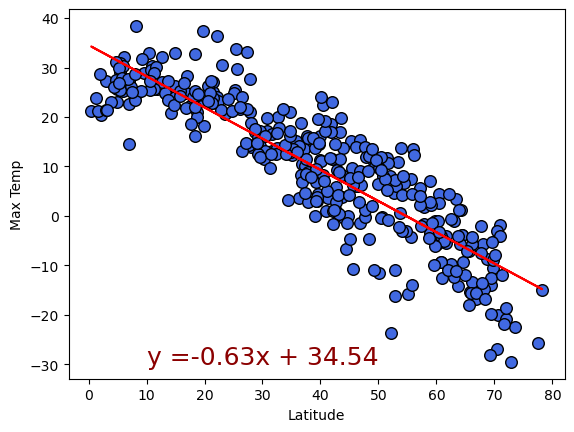

<Figure size 640x480 with 0 Axes>

In [52]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

# Save the figure:
plt.savefig('Latitude Vs. MaxTemp_North.png')

The r-value is: 0.685534137039032
R squared: 0.46995705304585045


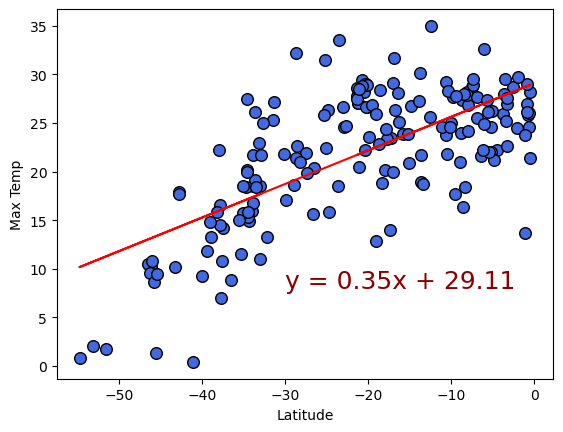

<Figure size 640x480 with 0 Axes>

In [53]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

# Save the figure:
plt.savefig('Latitude Vs. MaxTemp_South.png')

In [54]:
### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2774301598704362
R squared: 0.07696749360573583


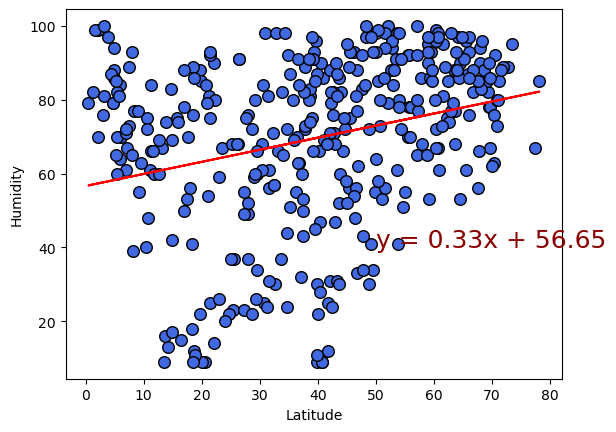

<Figure size 640x480 with 0 Axes>

In [55]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

# Save the figure:
plt.savefig('Latitude Vs. Humidity_North.png')

The r-value is: 0.3890546461201174
R squared: 0.15136351766764983


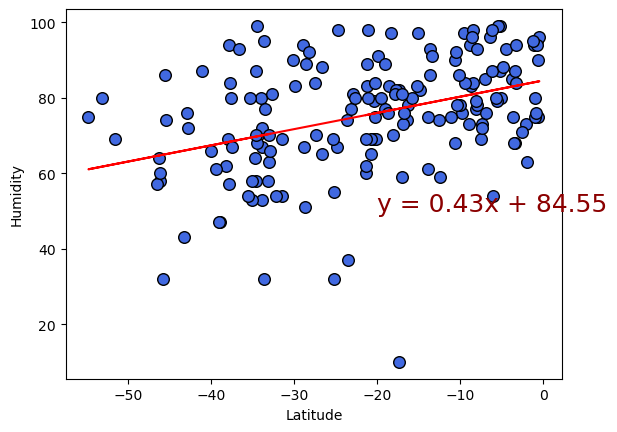

<Figure size 640x480 with 0 Axes>

In [56]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

# Save the figure:
plt.savefig('Latitude Vs. Humidity_South.png')

In [57]:
### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17388457242580468
R squared: 0.030235844527704944


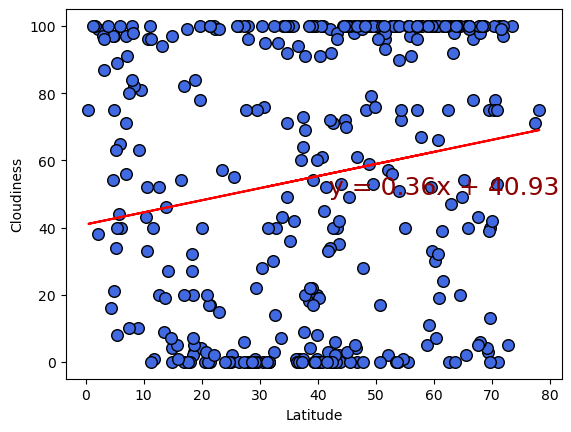

<Figure size 640x480 with 0 Axes>

In [58]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

# Save the figure:
plt.savefig('Latitude Vs. Cloudiness_North.png')

The r-value is: 0.478433738997755
R squared: 0.22889884261137183


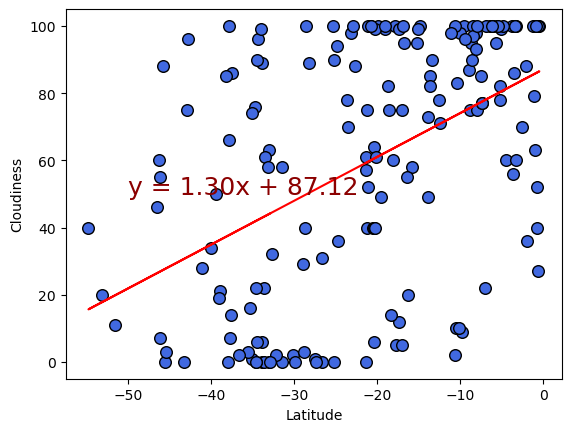

<Figure size 640x480 with 0 Axes>

In [59]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

# Save the figure:
plt.savefig('Latitude Vs. Cloudiness_South.png')

In [60]:
### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1499896879319382
R squared: 0.022496906485920207


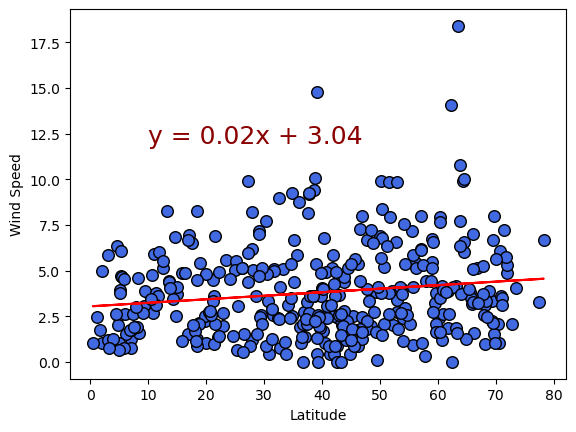

<Figure size 640x480 with 0 Axes>

In [61]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

# Save the figure:
plt.savefig('Latitude Vs. Wind_North.png')

The r-value is: -0.49407645240937637
R squared: 0.2441115408254348


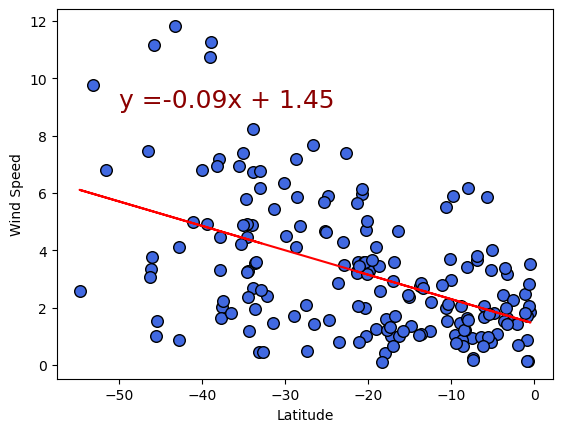

<Figure size 640x480 with 0 Axes>

In [62]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

# Save the figure:
plt.savefig('Latitude Vs. Wind_South.png')